In [1]:
%pylab inline
import os, sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
bookshelf = json.loads(open('bookshelf.json','r').read())['books']
count = 0
for b in bookshelf:
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        count += int(b['name'].split('(')[-1].split(')')[0])
    else:
        count += 1
print count, 'books read'

281 books read


In [23]:
monthly = dict()
monthlyA, monthlyB = dict(), dict()
for b in bookshelf:
    if len(b['date'].split('-')) < 2:
        continue
    dstr = '-'.join(b['date'].split('-')[:2])
    if dstr not in monthly:
        monthly[dstr] = 0
        monthlyA[dstr] = 0
        monthlyB[dstr] = 0
        
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        nBook = int(b['name'].split('(')[-1].split(')')[0])
        monthly[dstr] += nBook
        if 'audio' in b:
            monthlyA[dstr] += nBook
        else:
            monthlyB[dstr] += nBook
    else:
        monthly[dstr] += 1
        if 'audio' in b:
            monthlyA[dstr] += 1
        else:
            monthlyB[dstr] += 1
            
print monthly, sum(monthly.values())

{u'2011-08': 7, u'2011-09': 7, u'2014-08': 4, u'2014-05': 4, u'2014-04': 3, u'2014-07': 3, u'2014-06': 3, u'2011-06': 4, u'2011-07': 1, u'2014-03': 1, u'2011-05': 3, u'2012-10': 2, u'2010-03': 2, u'2010-08': 1, u'2013-08': 1, u'2010-04': 1, u'2010-07': 2, u'2013-05': 1, u'2015-11': 4, u'2015-10': 3, u'2015-12': 4, u'2013-01': 2, u'2013-02': 3, u'2013-03': 2, u'2008-08': 2, u'2013-07': 2, u'2010-09': 4, u'2009-06': 3, u'2007-01': 2, u'2008-05': 1, u'2008-06': 2, u'2008-07': 5, u'2009-07': 1, u'2011-02': 1, u'2009-05': 2, u'2009-04': 2, u'2016-10': 3, u'2010-10': 1, u'2009-01': 2, u'2011-03': 3, u'2009-03': 1, u'2009-09': 3, u'2009-11': 2, u'2015-06': 3, u'2015-07': 1, u'2015-04': 1, u'2015-02': 4, u'2015-03': 3, u'2015-01': 2, u'2014-12': 4, u'2007-09': 3, u'2011-11': 2, u'2011-12': 2, u'2007-04': 1, u'2012-09': 1, u'2012-08': 2, u'2007-12': 1, u'2011-04': 2, u'2007-10': 1, u'2012-03': 1, u'2012-02': 2, u'2012-01': 4, u'2009-12': 2, u'2013-12': 1, u'2012-05': 1, u'2010-11': 1, u'2006-06

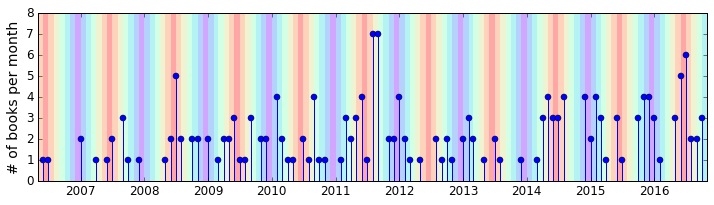

In [68]:
mSorted = sorted(monthly.keys())
#for m in mSorted:
#    print m, monthly[m], datetime.strptime(m, '%Y-%m')
    
fig = plt.figure(figsize=(12,3))
plt.stem([datetime.strptime(m, '%Y-%m') for m in mSorted], [monthly[m] for m in mSorted])
plt.ylim(ymax=max(monthly.values())+1)

sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-1)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+1)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.rainbow(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('reading_monthly_freq_stem.png', bbox_inches='tight', dpi=300)

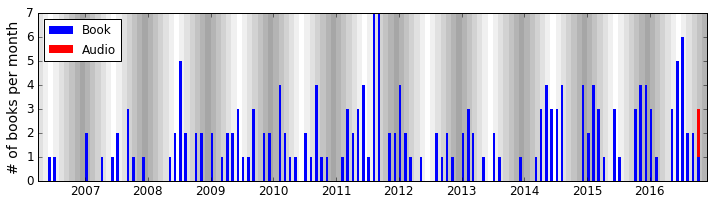

In [79]:
fig = plt.figure(figsize=(12,3))
mSorted = sorted(monthly.keys())
sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.gray(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

mSorted = [m for m in sorted(monthlyB.keys()) if monthlyB[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSorted], 
        [monthlyB[m] for m in mSorted], label='Book', 
        width = 15, linewidth=0, color='b')

mSorted = [m for m in sorted(monthlyA.keys()) if monthlyA[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSorted], 
        [monthlyA[m] for m in mSorted],
        bottom=[monthlyB.get(m,0) for m in mSorted],
        label='Audio', linewidth=0, color='r', width=15)

plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left')
plt.savefig('reading_monthly_freq.png', bbox_inches='tight', dpi=300)

In [5]:
# Inter-event time for finishing books
readDates = list()
for b in bookshelf:
    if len(b['date'].split('-')) < 3:
        continue
    readDates.append(datetime.strptime(b['date'], '%Y-%m-%d'))
print len(readDates)

sortedDates = sorted(readDates)
print sortedDates
tdiff = [(sortedDates[i]-sortedDates[i-1]).days for i in range(1, len(sortedDates))]
print tdiff

#plt.figure(figsize=(4,4))
#plt.hist(sorted(tdiff)[:-3])

28
[datetime.datetime(2009, 5, 20, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 12, 9, 0, 0), datetime.datetime(2015, 12, 25, 0, 0), datetime.datetime(2015, 12, 26, 0, 0), datetime.datetime(2015, 12, 30, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 30, 0, 0), datetime.datetime(2016, 2, 7, 0, 0), datetime.datetime(2016, 5, 13, 0, 0), datetime.datetime(2016, 5, 16, 0, 0), datetime.datetime(2016, 5, 20, 0, 0), datetime.datetime(2016, 6, 5, 0, 0), datetime.datetime(2016, 6, 15, 0, 0), datetime.datetime(2016, 6, 16, 0, 0), datetime.datetime(2016, 6, 17, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2016, 7, 5, 0, 0), datetime.datetime(2016, 7, 8, 0, 0), datetime.datetime(2016, 7, 11, 0, 0), datetime.datetime(2016, 7, 15, 0, 0), datetime.datetime(2016, 7, 21, 0, 0), datetime.datetime(2016, 7, 24, 0, 0), datetime.datetime(2016, 8, 9, 0, 0), datetime.datetime(2016, 8, 18, 0, 0), datetime.d